<a href="https://colab.research.google.com/github/Jdka1/Max-Price-Option-Pricing/blob/main/Module_8_Arbitrage_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

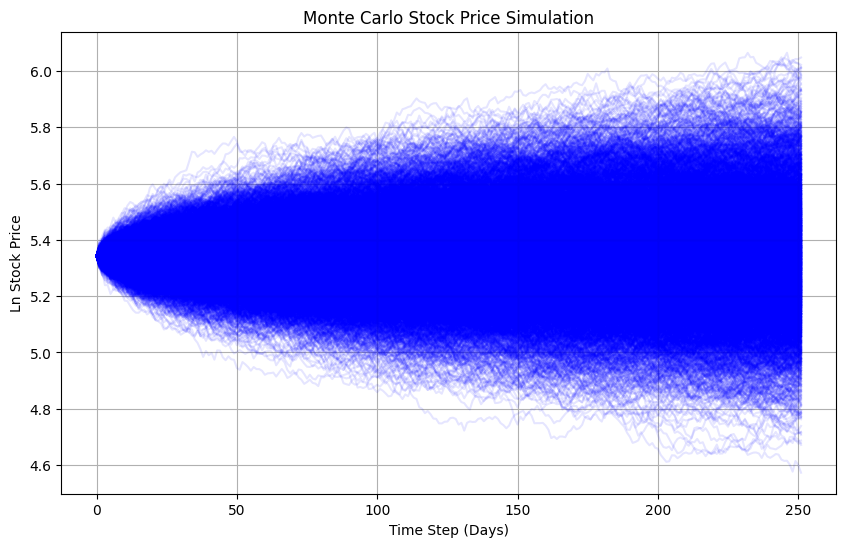

Average (Max - Final) Price during T = 1: 35.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def monte_carlo_simulation(S0, mu, sigma, T, dt, num_simulations):
    num_steps = int(T / dt)
    prices = np.zeros((num_steps, num_simulations))
    prices[0] = S0

    for t in range(1, num_steps):
        z = np.random.normal(mu, sigma, num_simulations)     # Generate random values for simulation (standard normal distribution)
        prices[t] = prices[t - 1] + z                       # Simulate next price

    return prices

# Parameters
S0 = 5.342286404              # Initial stock price
mu = 0.0                      # Expected annual return (drift)
sigma = 0.01393283429         # Daily volatility (standard deviation)
T = 1                         # Total time in years (1 year)
dt = 1/252                    # Daily time step (assuming 252 trading days in a year)
num_simulations = 4388        # Number of simulations


simulated_prices = monte_carlo_simulation(S0, mu, sigma, T, dt, num_simulations)


plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, alpha=0.1, color='blue')
plt.title("Monte Carlo Stock Price Simulation")
plt.xlabel("Time Step (Days)")
plt.ylabel("Ln Stock Price")
plt.grid()
plt.show()

log_final_prices = simulated_prices[-1]
log_max_prices = np.max(simulated_prices, axis=0)

max_prices = np.exp(log_max_prices)
final_prices = np.exp(log_final_prices)

max_minus_final = max_prices - final_prices
average_max_minus_final = np.mean(max_minus_final)

print(f"Average (Max - Final) Price during T = {T}: {average_max_minus_final:.2f}")